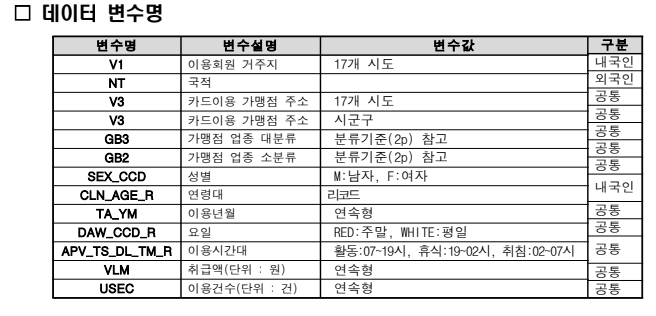

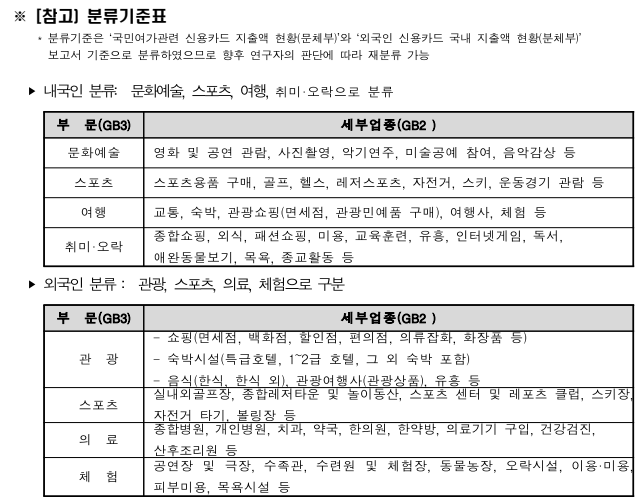

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


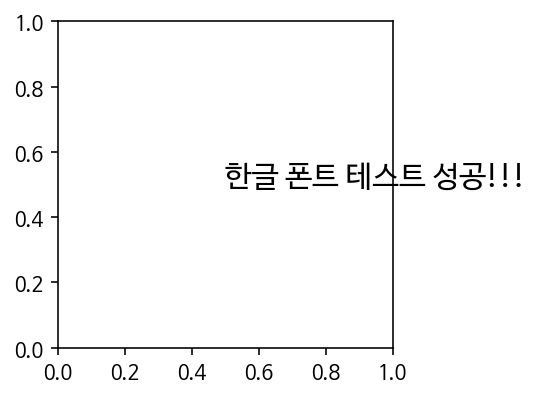

In [ ]:
# 그래프 한글폰트 사용설정 in Colab

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/My Drive/파이썬/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format) # 항상 float 형식으로
# pd.set_option('display.float_format', '{:.2e}'.format) # 항상 사이언티픽
# pd.set_option('display.float_format', '${:.2g}'.format)  # 적당히 알아서
# pd.set_option('display.float_format', None) # 다시 되돌리기

In [ ]:
df = pd.read_table('/content/drive/MyDrive/2021 문화관광/DataSet/NATIVE.txt', sep='|')

In [ ]:
df.columns = ['회원거주지', '가맹점주소', '시군구', '업종대분류', '업종소분류', '성별', '연령대', '이용연월','요일', '이용시간대', '취급액', '이용건수']

In [ ]:
df = df[df['회원거주지'] != df['가맹점주소']].loc[(df['가맹점주소'] == '서울') | (df['가맹점주소'] == '경기') | (df['가맹점주소'] == '인천')]
df.head()

,회원거주지,가맹점주소,시군구,업종대분류,업종소분류,성별,연령대,이용연월,요일,이용시간대,취급액,이용건수
155,전북,인천,동구,취미오락,외식,M,40.0,201701,WHITE,활동,918720,46
246,경기,인천,서구,문화예술활동,공연관람,M,30.0,201701,WHITE,활동,1023584,97
274,경기,인천,서구,취미오락,외식,M,50.0,201701,WHITE,휴식,169404544,4069
282,충남,인천,서구,취미오락,외식,M,20.0,201701,RED,휴식,7558560,269
285,서울,인천,서구,취미오락,외식,F,30.0,201701,WHITE,활동,87873271,6268


In [ ]:
# 결측치 비율 확인
np.round(df.isna().sum()/df.shape[0],3)

회원거주지    0.006
가맹점주소    0.000
시군구      0.000
업종대분류    0.000
업종소분류    0.000
성별       0.000
연령대      0.000
이용연월     0.000
요일       0.000
이용시간대    0.000
취급액      0.000
이용건수     0.000
dtype: float64

In [ ]:
# 회원 거주지의 결측치가 가장 많지만 결측치 비율이 0.006으로 근소하다 생각하여 컷!
df.dropna(subset=['회원거주지','연령대'], how='any', axis=0, inplace=True)
df.isna().sum()

회원거주지    0
가맹점주소    0
시군구      0
업종대분류    0
업종소분류    0
성별       0
연령대      0
이용연월     0
요일       0
이용시간대    0
취급액      0
이용건수     0
dtype: int64

In [ ]:
# 이용연도 2019~2021년까지 추출(정렬 먼저)
df.sort_values(by='이용연월', inplace=True)
df = df.loc[df['이용연월'] >= 201901]
df['이용연월'] = df['이용연월'].astype('str')
df.head()

,회원거주지,가맹점주소,시군구,업종대분류,업종소분류,성별,연령대,이용연월,요일,이용시간대,취급액,이용건수
25184678,대전,경기,파주시,취미오락,미용,M,30.0,201901,WHITE,휴식,75450,5
25184677,충북,경기,파주시,여행,숙박,M,20.0,201901,RED,활동,1131750,10
25184663,인천,경기,파주시,취미오락,애완동물돌보기,M,30.0,201901,RED,활동,455215,25
25184676,인천,경기,파주시,문화예술활동,사진촬영,M,40.0,201901,WHITE,활동,3521000,5
25184674,전남,경기,파주시,여행,숙박,M,20.0,201901,WHITE,휴식,209248,10


In [ ]:
# 여행객 데이터만 추출하여 df_tour 데이터 프레임 생성
df_tour = df.loc[df['업종대분류'] == '여행'].copy()
df_tour.head()

,회원거주지,가맹점주소,시군구,업종대분류,업종소분류,성별,연령대,이용연월,요일,이용시간대,취급액,이용건수
25184677,충북,경기,파주시,여행,숙박,M,20.0,201901,RED,활동,1131750,10
25184674,전남,경기,파주시,여행,숙박,M,20.0,201901,WHITE,휴식,209248,10
25184664,인천,경기,파주시,여행,체험,F,20.0,201901,WHITE,활동,293752,30
25184669,대구,경기,파주시,여행,숙박,M,20.0,201901,RED,활동,628750,10
25184665,전북,경기,파주시,여행,숙박,M,40.0,201901,WHITE,활동,251500,5


## EDA

### 뉴노멀 시기 정의하기

In [ ]:
# 코로나 이전 관광을 목적으로 서울을 방문하는 고객의 카드이용건수 총합
before = pd.pivot_table(data=df_tour.loc[df_tour['이용연월'].str.startswith('2019')], index='회원거주지', columns='가맹점주소', values='이용건수', aggfunc='sum').reset_index()

columns = before.columns[1:]

for col in columns:
  print(before.sort_values(by=col, ascending=False))

가맹점주소 회원거주지         경기          서울         인천
8        서울  4419474.0         NaN  3600632.0
16       충북  1712130.0   4391354.0   283589.0
11       인천  1522161.0   3318283.0        NaN
2        경남  1451968.0   5418086.0   133626.0
15       충남  1356644.0   3317096.0   269727.0
0        강원   992290.0   3997461.0   257708.0
12       전남   787288.0   2654405.0   106214.0
6        대전   606795.0   2660379.0   206530.0
7        부산   481713.0   4849917.0   139241.0
3        경북   475519.0   3635988.0   154453.0
4        광주   469293.0   2491864.0   132477.0
13       전북   459918.0   3046248.0   153408.0
5        대구   327712.0   3428039.0   141978.0
10       울산   197876.0   2687855.0    66832.0
9        세종    84863.0    723661.0    52972.0
14       제주    79638.0   1389582.0    48346.0
1        경기        NaN  21228561.0  3539858.0
가맹점주소 회원거주지         경기          서울         인천
1        경기        NaN  21228561.0  3539858.0
2        경남  1451968.0   5418086.0   133626.0
7        부산   481713.0   4849917.0

<2019년>

* 경기 top 5 : 서울, 충북, 인천, 경남, 충남
* 서울 top 5 : 경기, 경남, 부산, 충북, 강원
* 인천 top 5 : 서울, 경기, 충북, 충남, 강원

In [ ]:
after = pd.pivot_table(data=df_tour.loc[df_tour['이용연월'].str.startswith('2020')], index='회원거주지', columns='가맹점주소', values='이용건수', aggfunc='sum').reset_index()
columns = after.columns[1:]

for col in columns:
  print(after.sort_values(by=col, ascending=False))

가맹점주소 회원거주지         경기         서울        인천
8        서울  2330033.0        NaN  731291.0
16       충북  1076847.0  1002781.0   51114.0
2        경남   984817.0  1499124.0   27496.0
15       충남   859738.0   825135.0   50554.0
11       인천   824210.0   961672.0       NaN
0        강원   584668.0  1000907.0   46199.0
12       전남   523784.0   790140.0   18297.0
6        대전   357969.0   802185.0   33688.0
7        부산   319726.0  1733996.0   31292.0
4        광주   306132.0   855162.0   21148.0
13       전북   290736.0  1035900.0   25505.0
3        경북   225196.0  1046854.0   28015.0
5        대구   158729.0  1136835.0   26333.0
10       울산   101572.0   932545.0   13085.0
9        세종    43113.0   269500.0    9073.0
14       제주    43019.0   545052.0   27553.0
1        경기        NaN  6484098.0  789344.0
가맹점주소 회원거주지         경기         서울        인천
1        경기        NaN  6484098.0  789344.0
7        부산   319726.0  1733996.0   31292.0
2        경남   984817.0  1499124.0   27496.0
5        대구   158729.0  1136835.

인천지역은 근교로 잡히는듯..?

# 코로나 이후 (2020년 / 2021년 비교)

In [ ]:
# 코로나 이후 데이터 비교(여행지역의 트렌드 변화를 보기위해)

df_2020 = df_tour[df_tour['이용연월'].str.startswith('2020')].copy()
df_2021 = df_tour[df_tour['이용연월'].str.startswith('2021')].copy()

In [ ]:
after_2020 = pd.pivot_table(data=df_2020, index='회원거주지', columns='가맹점주소', values='이용건수', aggfunc='sum').reset_index()
columns = after_2020.columns[1:]

for col in columns:
  print(after_2020.sort_values(by=col, ascending=False))

가맹점주소 회원거주지         경기         서울        인천
8        서울  2330033.0        NaN  731291.0
16       충북  1076847.0  1002781.0   51114.0
2        경남   984817.0  1499124.0   27496.0
15       충남   859738.0   825135.0   50554.0
11       인천   824210.0   961672.0       NaN
0        강원   584668.0  1000907.0   46199.0
12       전남   523784.0   790140.0   18297.0
6        대전   357969.0   802185.0   33688.0
7        부산   319726.0  1733996.0   31292.0
4        광주   306132.0   855162.0   21148.0
13       전북   290736.0  1035900.0   25505.0
3        경북   225196.0  1046854.0   28015.0
5        대구   158729.0  1136835.0   26333.0
10       울산   101572.0   932545.0   13085.0
9        세종    43113.0   269500.0    9073.0
14       제주    43019.0   545052.0   27553.0
1        경기        NaN  6484098.0  789344.0
가맹점주소 회원거주지         경기         서울        인천
1        경기        NaN  6484098.0  789344.0
7        부산   319726.0  1733996.0   31292.0
2        경남   984817.0  1499124.0   27496.0
5        대구   158729.0  1136835.

<2020년>
* 경기지역 top 5 : 서울, 충북. 경남, 충남, 인천
* 서울지역 top 5 : 경기, 부산, 경남, 대구, 경북
* 인천지역 top 5 : 경기, 서울, 충북, 충남, 강원

In [ ]:
after_2021 = pd.pivot_table(data=df_2021, index='회원거주지', columns='가맹점주소', values='이용건수', aggfunc='sum').reset_index()
columns = after_2021.columns[1:]

for col in columns:
  print(after_2021.sort_values(by=col, ascending=False))

가맹점주소 회원거주지        경기        서울       인천
8        서울  308968.0       NaN  68864.0
16       충북  117511.0  124817.0   3063.0
11       인천  106168.0  132844.0      NaN
2        경남  105407.0  170521.0   5234.0
15       충남   93965.0  111092.0   3535.0
0        강원   57783.0  107127.0   2706.0
12       전남   52697.0  102496.0   1172.0
6        대전   39173.0  111017.0   1763.0
7        부산   36430.0  222917.0   7782.0
13       전북   32314.0  131605.0   1219.0
4        광주   30817.0  115834.0   1094.0
3        경북   25135.0  135565.0   2521.0
5        대구   18212.0  163830.0   1680.0
10       울산   10212.0  120966.0   1177.0
9        세종    5252.0   39969.0    545.0
14       제주    4907.0   71020.0   5376.0
1        경기       NaN  929392.0  79969.0
가맹점주소 회원거주지        경기        서울       인천
1        경기       NaN  929392.0  79969.0
7        부산   36430.0  222917.0   7782.0
2        경남  105407.0  170521.0   5234.0
5        대구   18212.0  163830.0   1680.0
3        경북   25135.0  135565.0   2521.0
11       인천  106

<2021년>
* 경기지역 top 5 : 서울, 충북. 인천, 경남, 충남
* 서울지역 top 5 : 경기, 부산, 경남, 대구, 경북
* 인천지역 top 5 : 경기, 서울, 부산, 제주, 경남

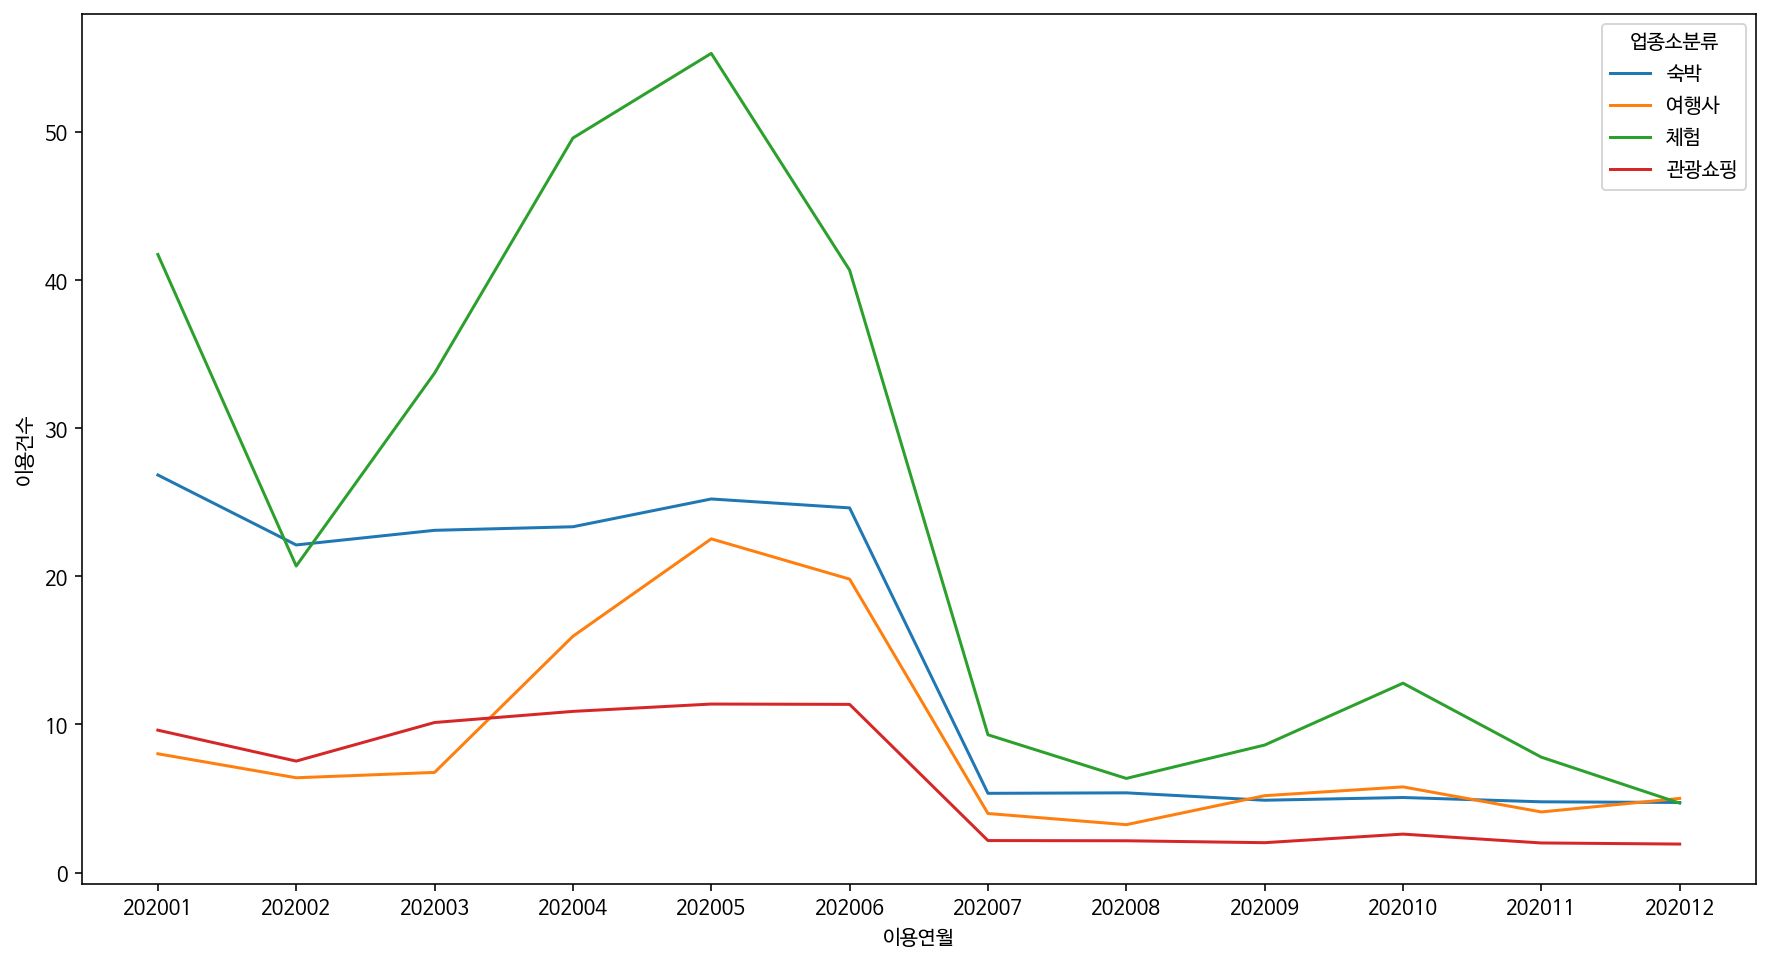

In [ ]:
# 2020년과 2021년에 경기지역에 여행을 목적으로 방문하는 고객의 주소지에 근교라고 할수있는 변화를 식별하여 비교해보기(교통제외)
plt.figure(figsize=(15,8))
sns.lineplot(data = df_2020.loc[(df['가맹점주소'] == '경기') & (df['업종소분류'] != '교통')], x='이용연월', y='이용건수', hue = '업종소분류', ci=None)

-> 2020년에 여행을 목적으로 경기지역을 방문한 카드이용 고객의 이용건수는 교통을 위한 지출을 제외하고 체험 분야가 제일 많았다. 

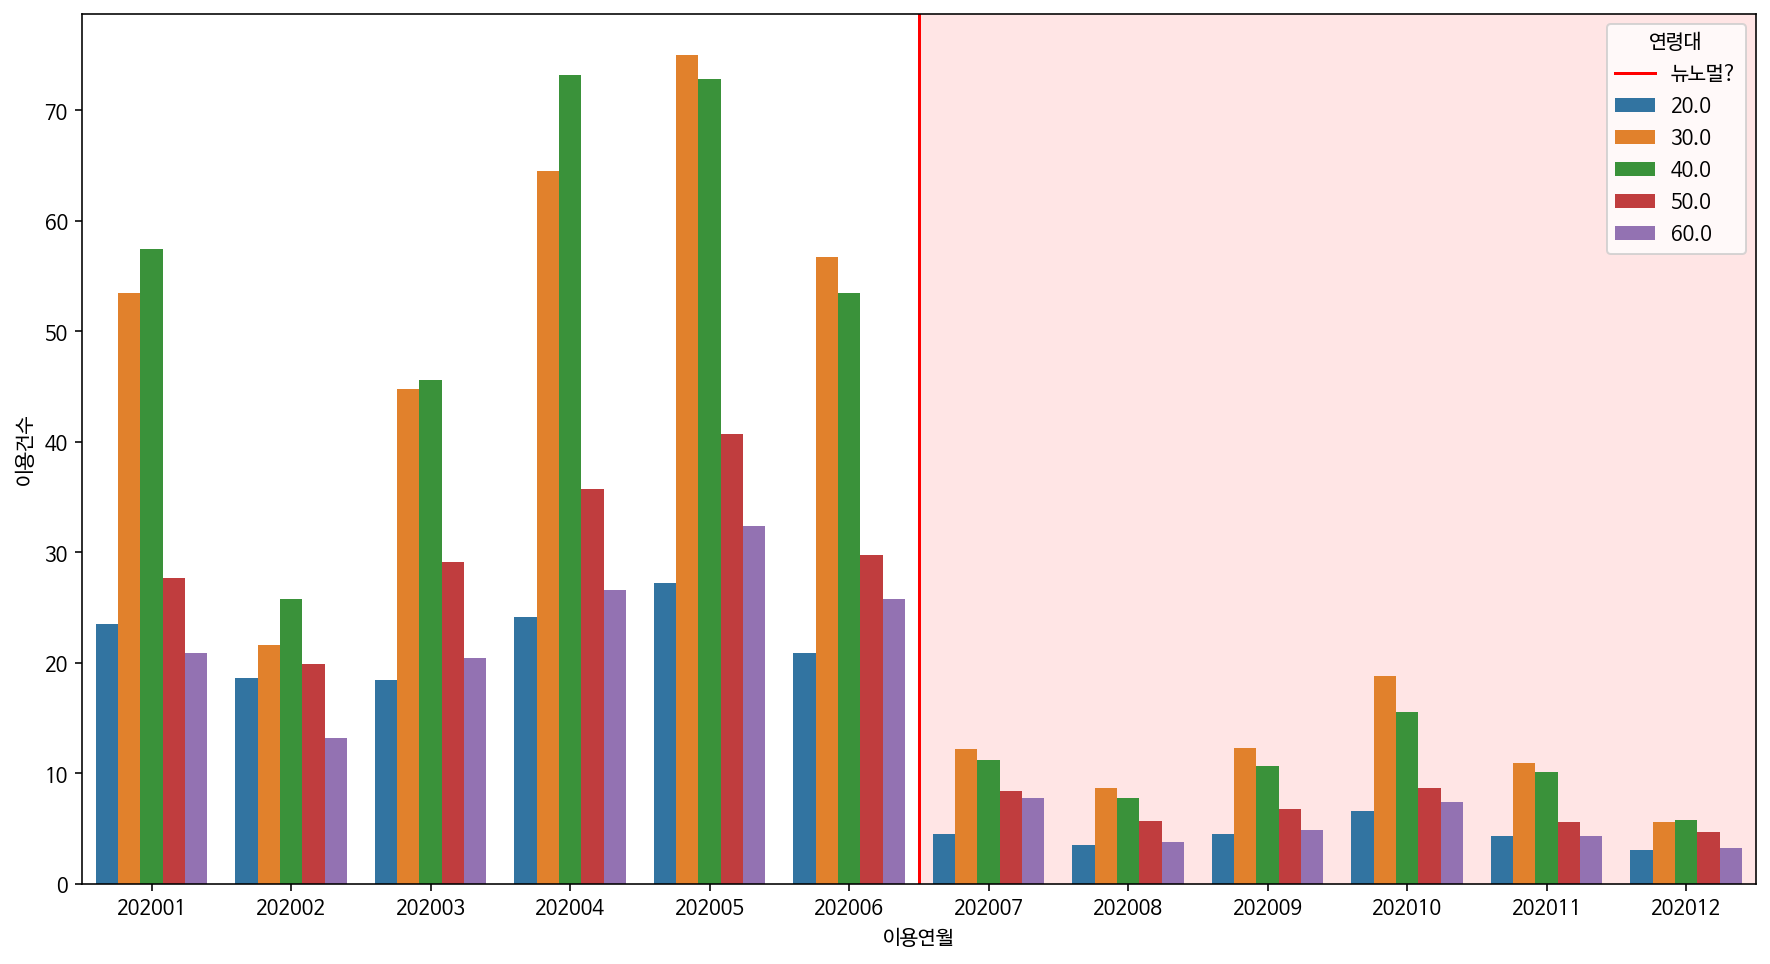

In [ ]:
plt.figure(figsize=(15,8))
plt.legend()
plt.axvline(x=5.5,color='red', label='뉴노멀?')
plt.axvspan(5.5,12, facecolor='red', alpha = 0.1)
sns.barplot(data = df_2020.loc[(df_2020['가맹점주소'] == '경기') & (df_2020['업종소분류'] == '체험')], x='이용연월', y='이용건수', hue = '연령대',ci=None)

-> 체험학습 = 30 ~ 40대가 가장 많았고, 7월이후를 뉴노멀 시대라고봐도 될지..?

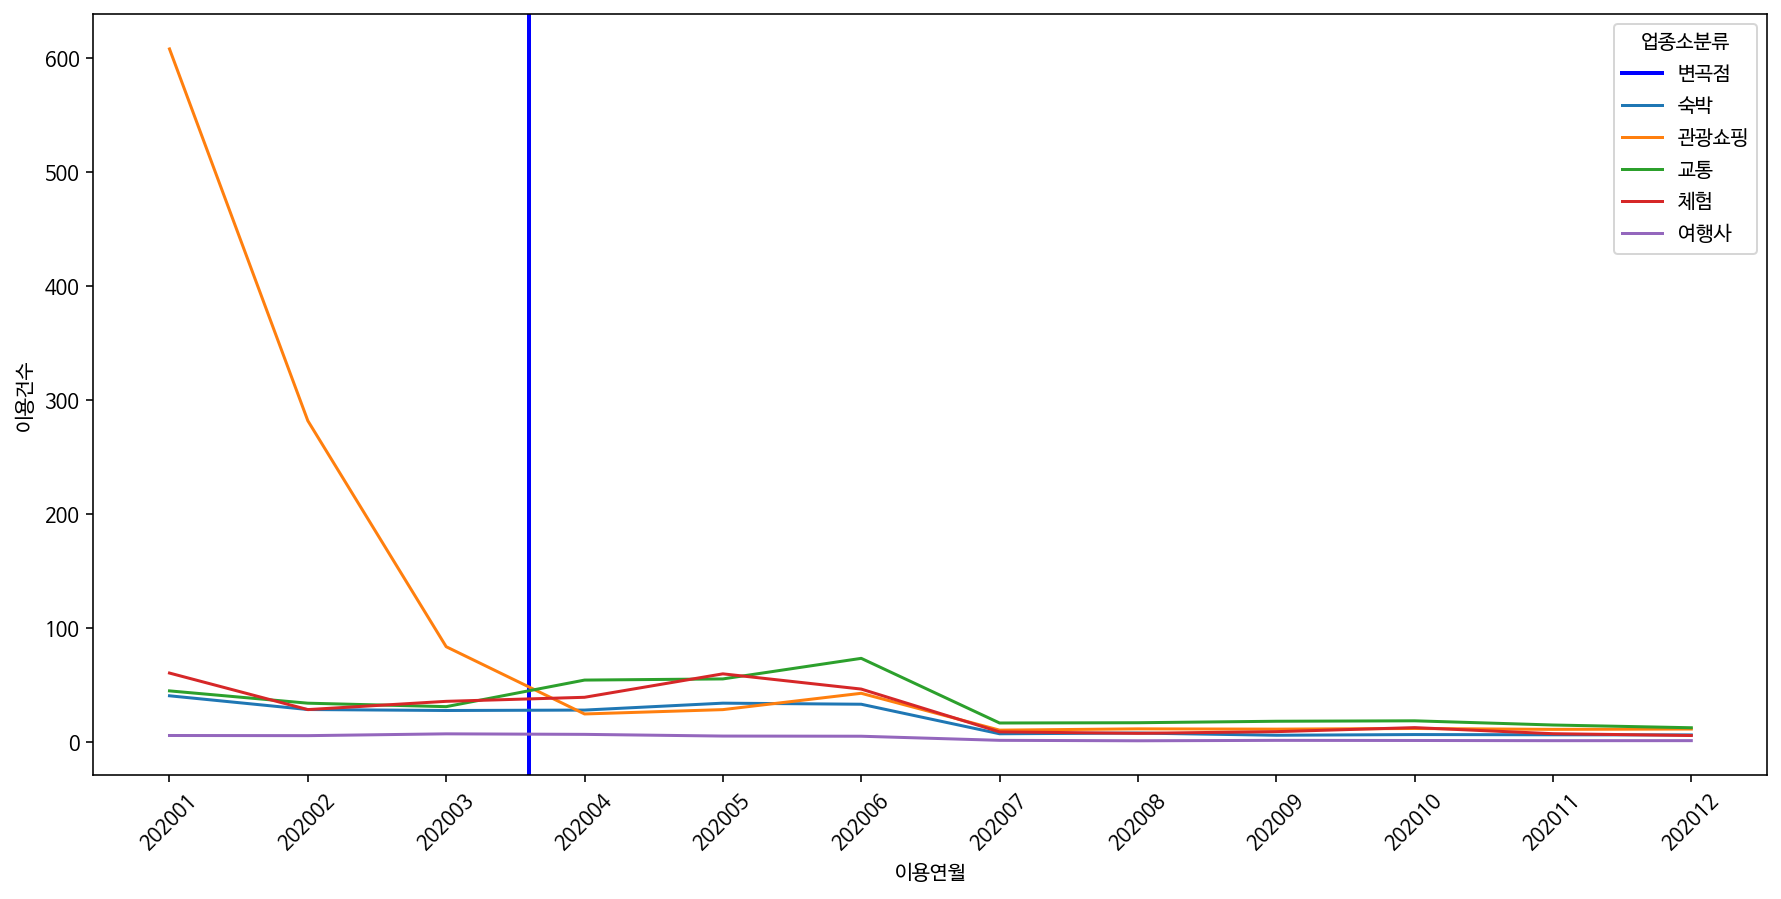

In [ ]:
!plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
plt.axvline(x=2.6, label='변곡점',color='blue', linewidth=2)
sns.lineplot(data = df_2020.loc[df['가맹점주소'] == '인천'], x='이용연월', y='이용건수', hue ='업종소분류',ci=None)

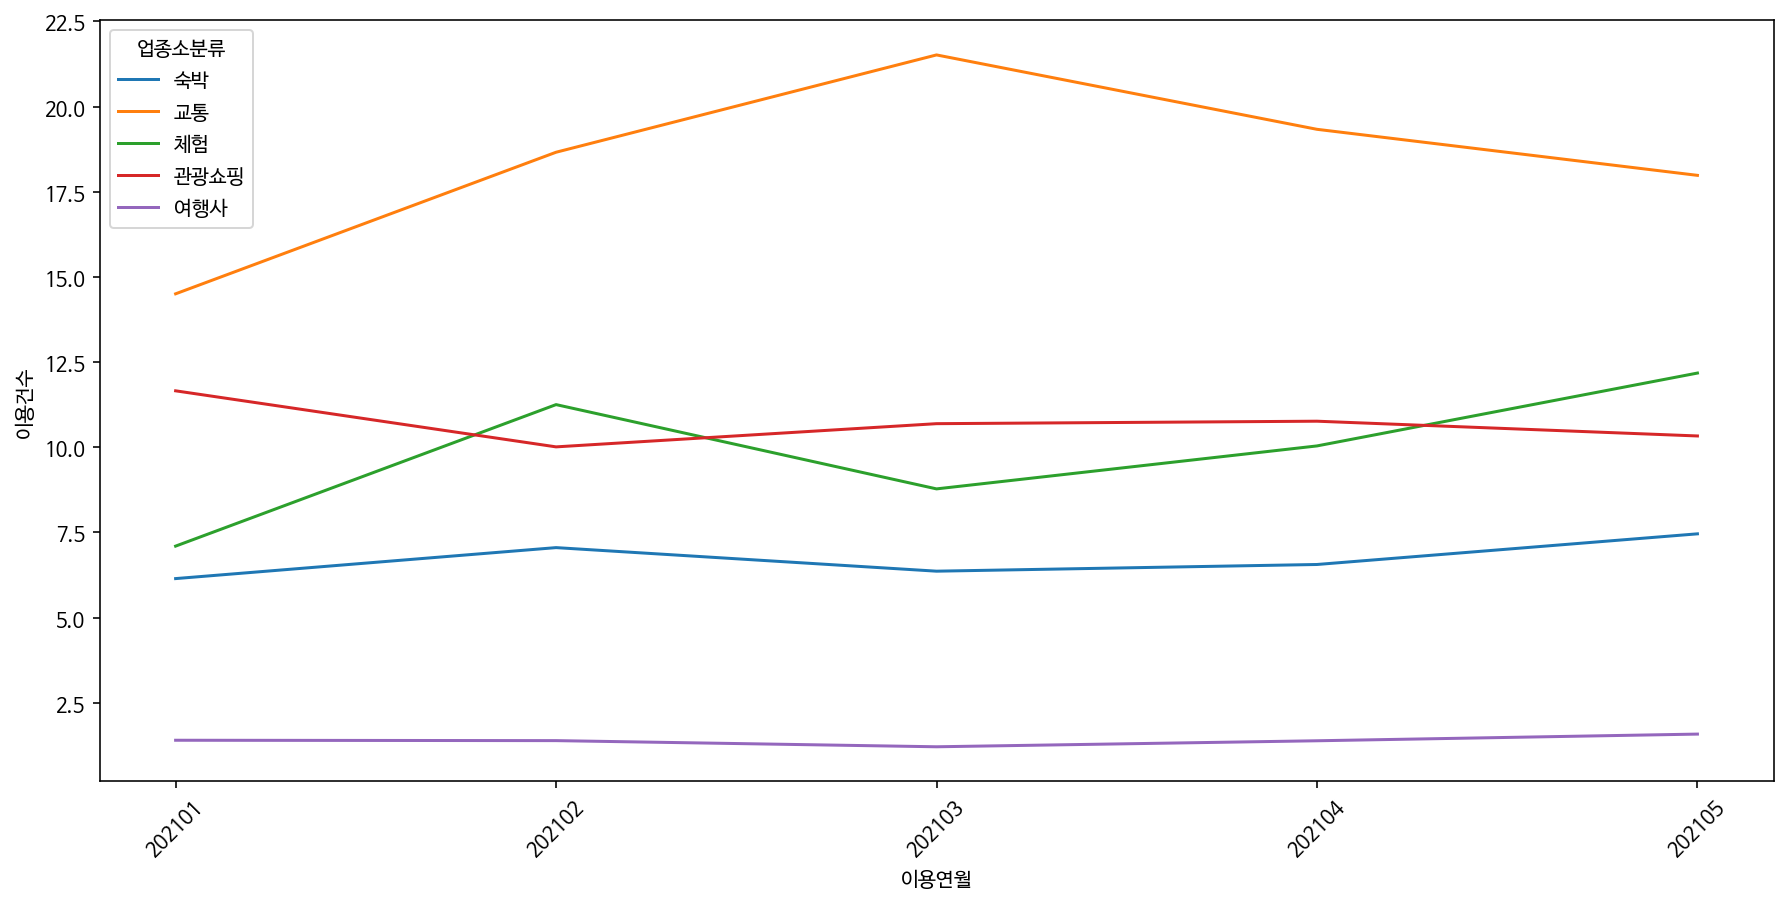

In [ ]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
# plt.axvline(x=2.6, label='변곡점',color='blue', linewidth=2)
sns.lineplot(data = df_2021.loc[df['가맹점주소'] == '인천'], x='이용연월', y='이용건수', hue ='업종소분류',ci=None)

In [ ]:
df_tour[['취급액','이용건수']].describe()

,취급액,이용건수
count,520969.0000,520969.0000
mean,11446211.8583,178.4207
std,93392777.0121,1058.8913
min,0.0000,1.0000
25%,149565.0000,5.0000
50%,557700.0000,10.0000
75%,2780300.0000,35.0000
max,10508464541.0000,62503.0000


In [ ]:
# 강원도에서 강서구로.. 교통 목적으로면 김포공항??
df_tour.loc[df_tour['취급액'] >= 10508464540]

,회원거주지,가맹점주소,시군구,업종대분류,업종소분류,성별,연령대,이용연월,요일,이용시간대,취급액,이용건수
34961020,강원,서울,강서구,여행,교통,M,30.0000,201911,WHITE,활동,10508464541,846


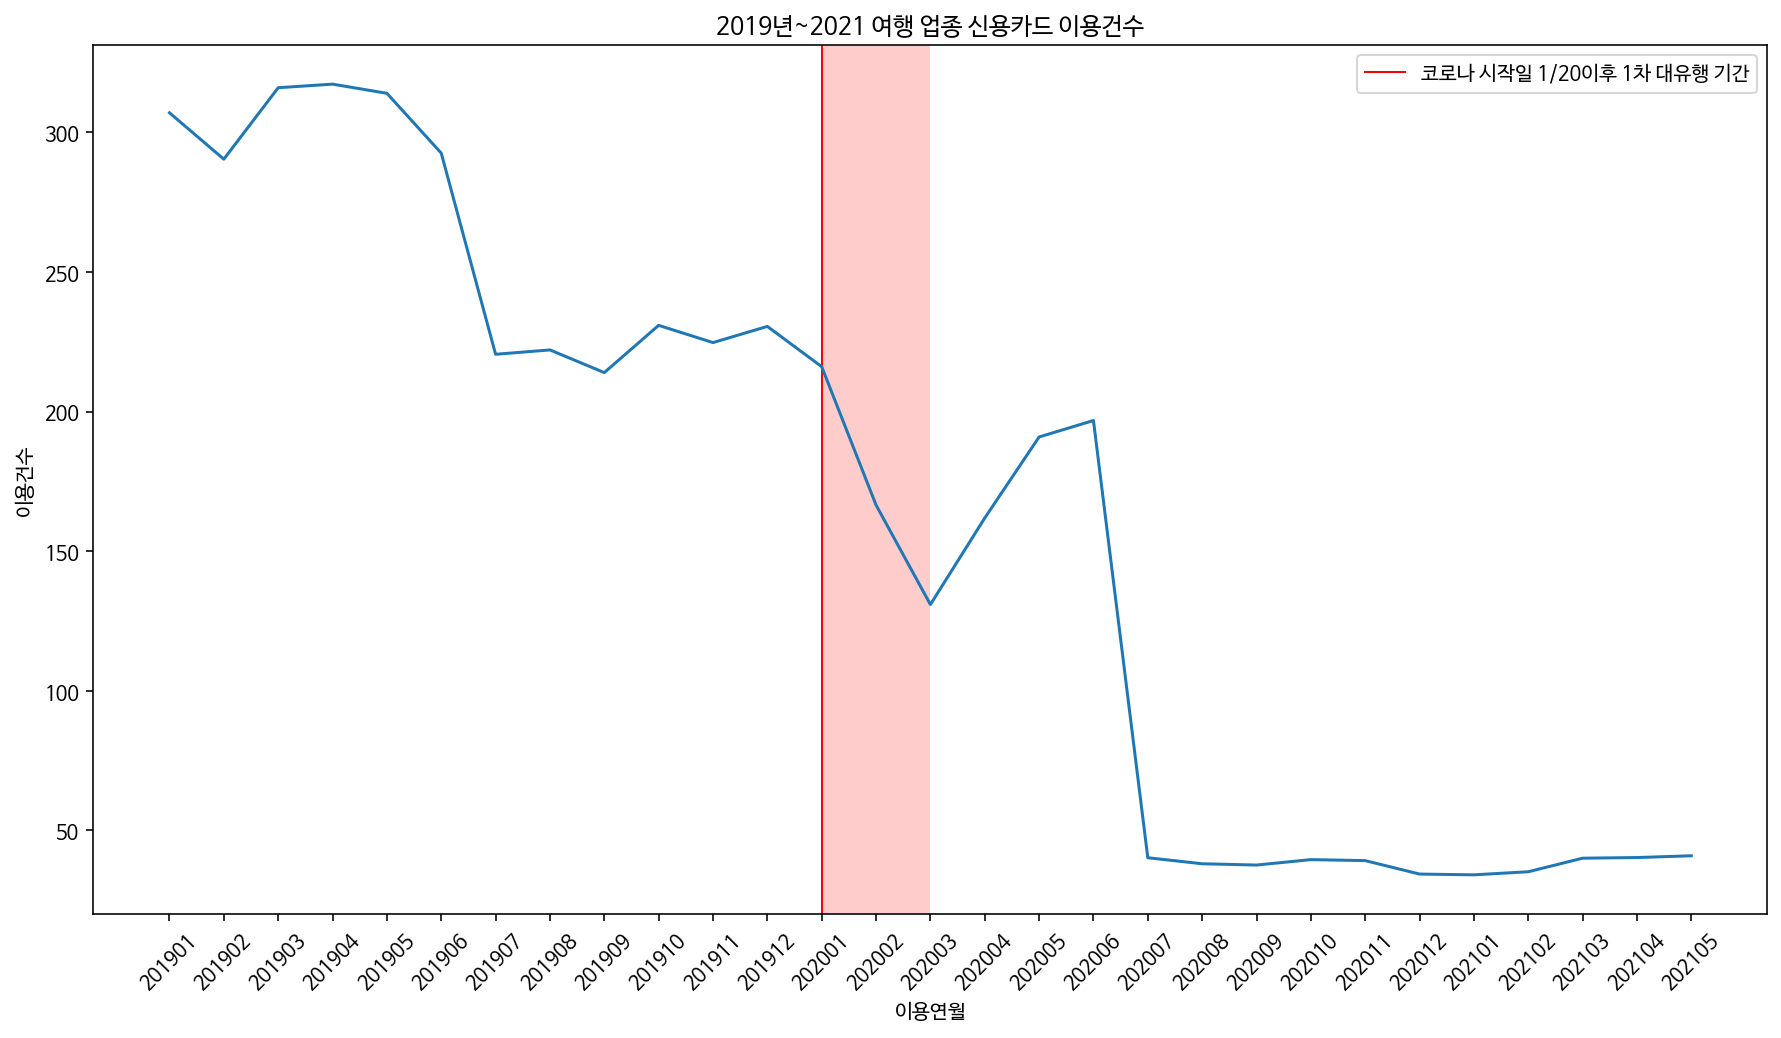

In [ ]:
plt.figure(figsize=(15,8))
plt.title('2019년~2021 여행 업종 신용카드 이용건수')
plt.xticks(rotation=45)
plt.axvline(x=12, color='red', linewidth = 1, label = '코로나 시작일 1/20이후 1차 대유행 기간')
plt.axvspan(12,14, facecolor='red', alpha = 0.2)
plt.legend(fontsize = 20)
sns.lineplot(data= df_tour, x='이용연월', y='이용건수', ci=None)

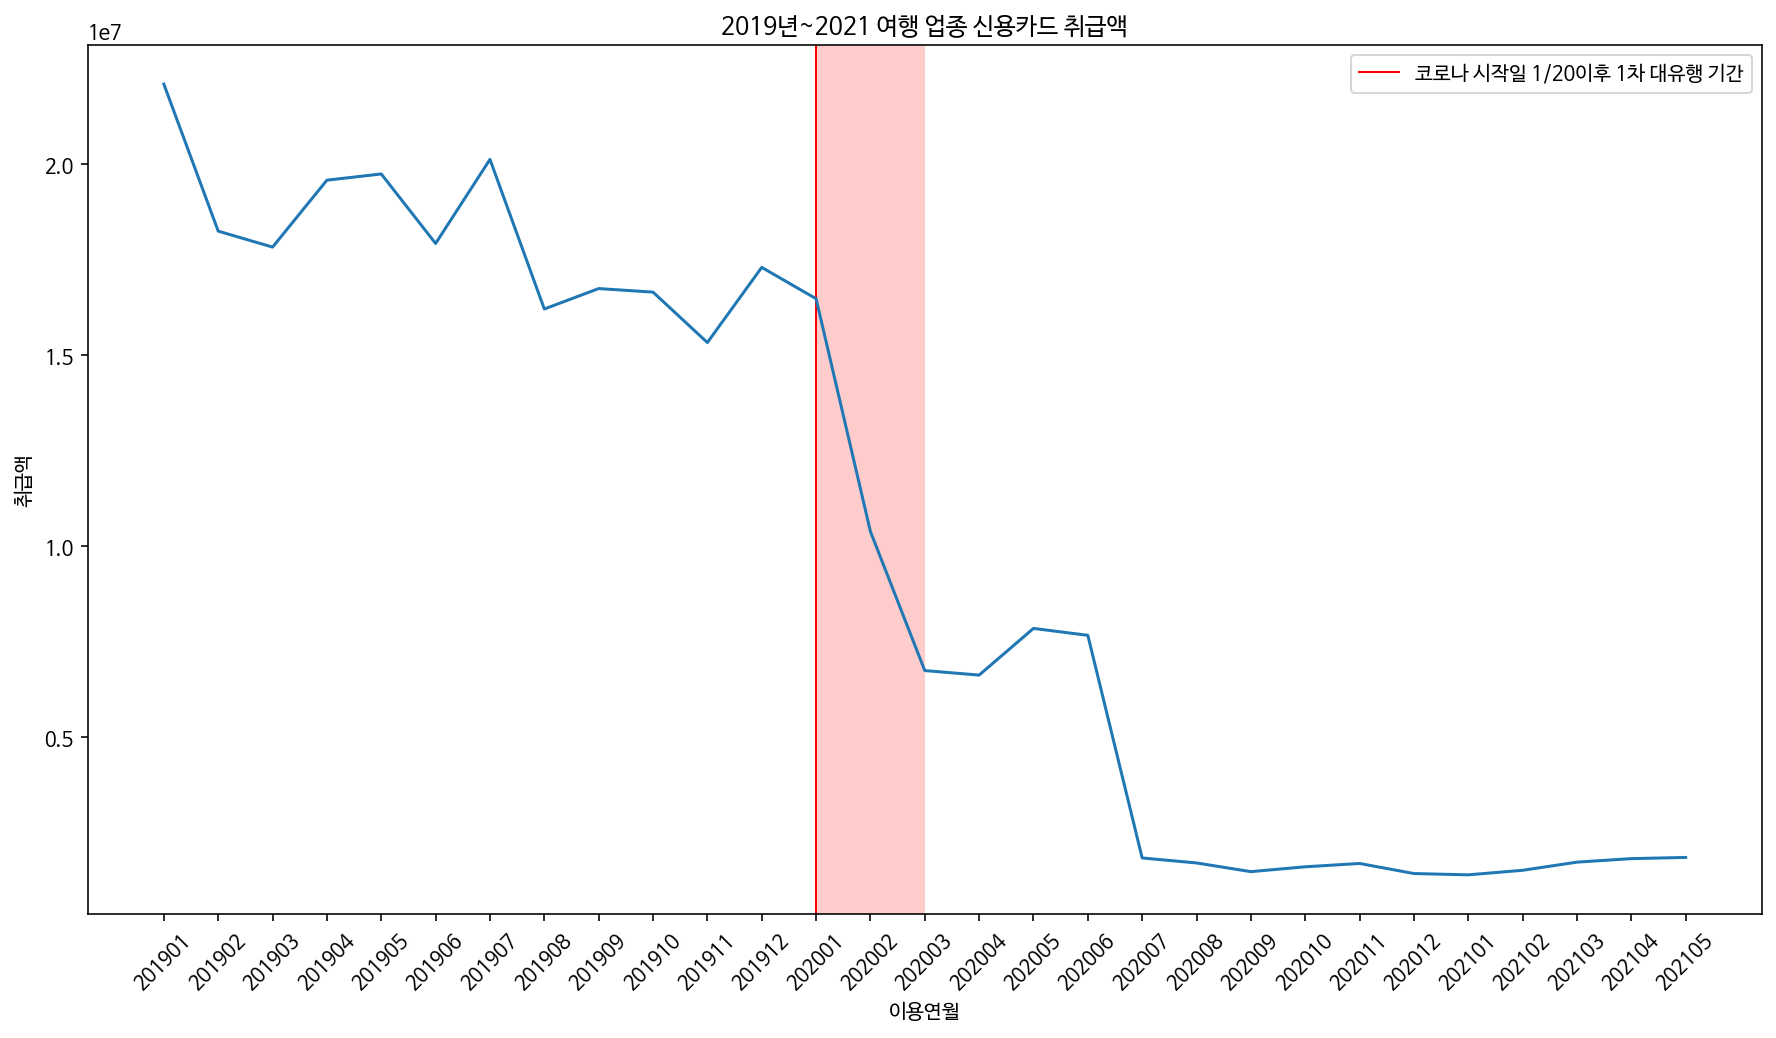

In [ ]:
plt.figure(figsize=(15,8))
plt.title('2019년~2021 여행 업종 신용카드 취급액')
plt.xticks(rotation=45)
plt.axvline(x=12, color='red', linewidth = 1, label = '코로나 시작일 1/20이후 1차 대유행 기간')
plt.axvspan(12,14, facecolor='red', alpha = 0.2)
plt.legend(fontsize = 20)
sns.lineplot(data= df_tour, x='이용연월', y='취급액', ci=None)

-> 여행업종에서 코로나 1차 대유행이 시작됐던 시기에 카드이용건수와 취급액이 급격하게 줄어들은 것이 확인 되었다. 그 후 소폭 상승하며 회복하는 경향을 보였지만 7월에 급격하게 하락 후 회복하지 못하는 경향을 보였는데 왜 7월..?

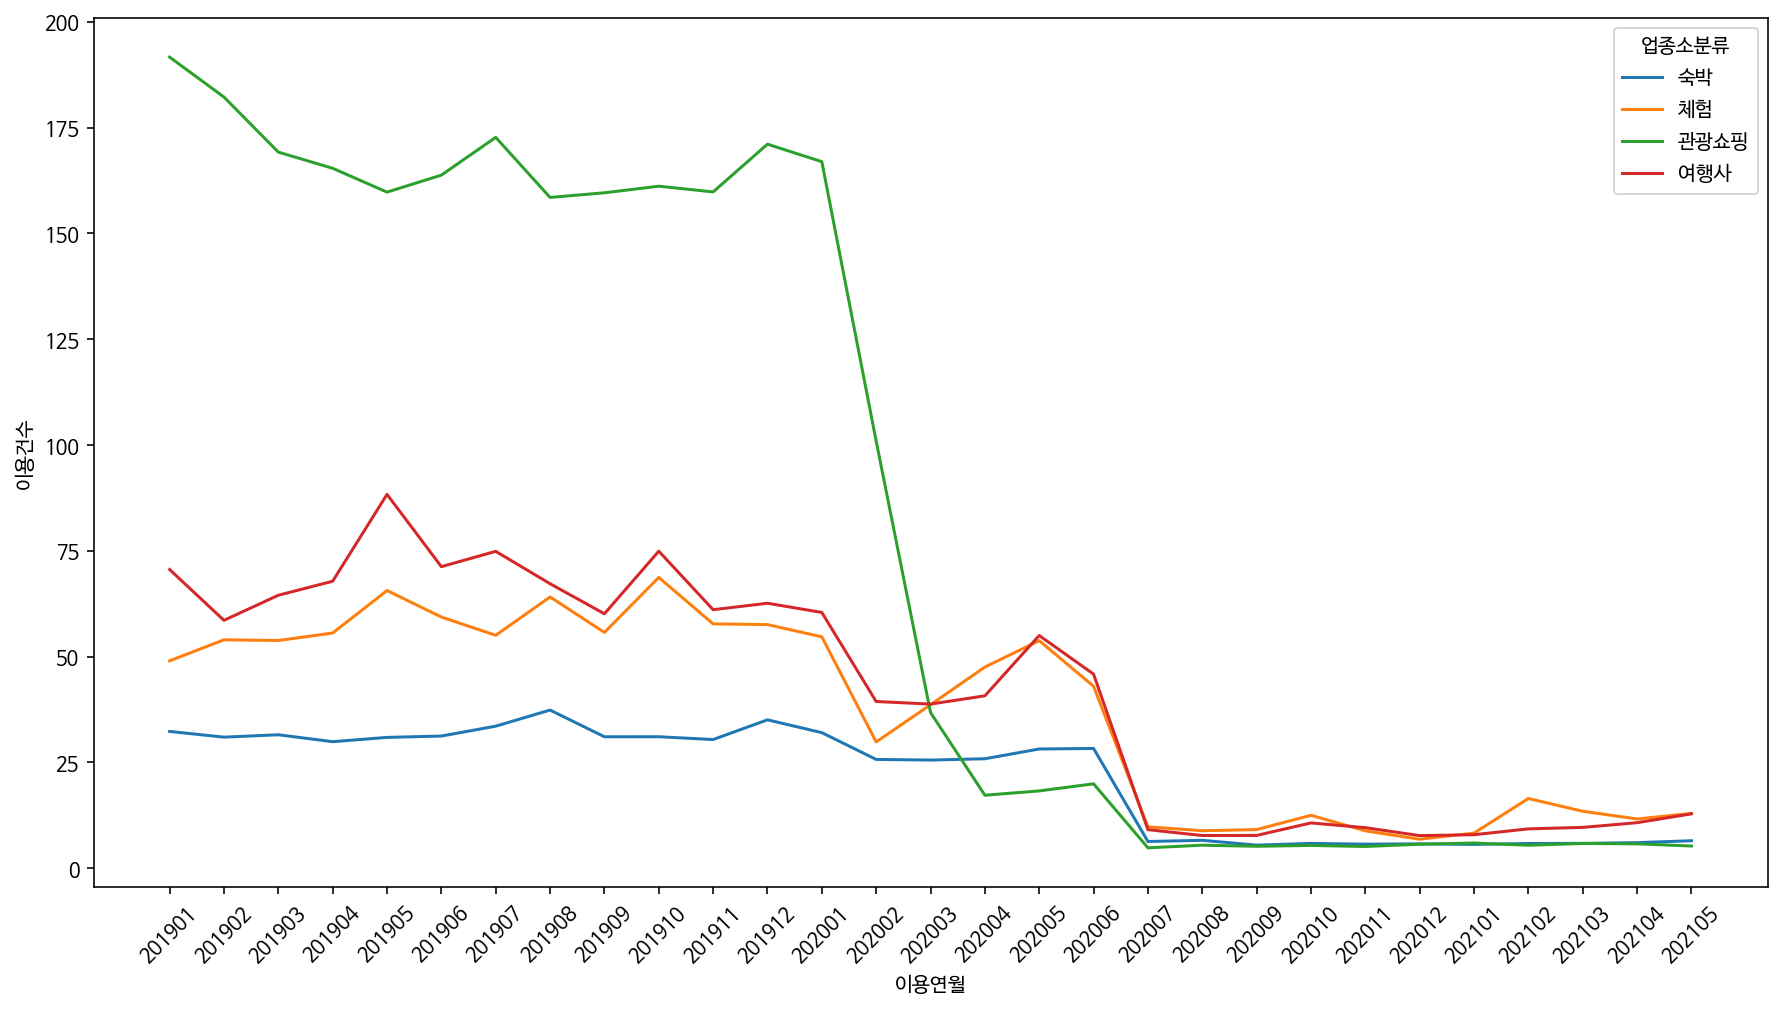

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.lineplot(data= df_tour.loc[(df_tour['업종소분류'] != '교통')], x='이용연월', y='이용건수',hue='업종소분류' ,ci=None)

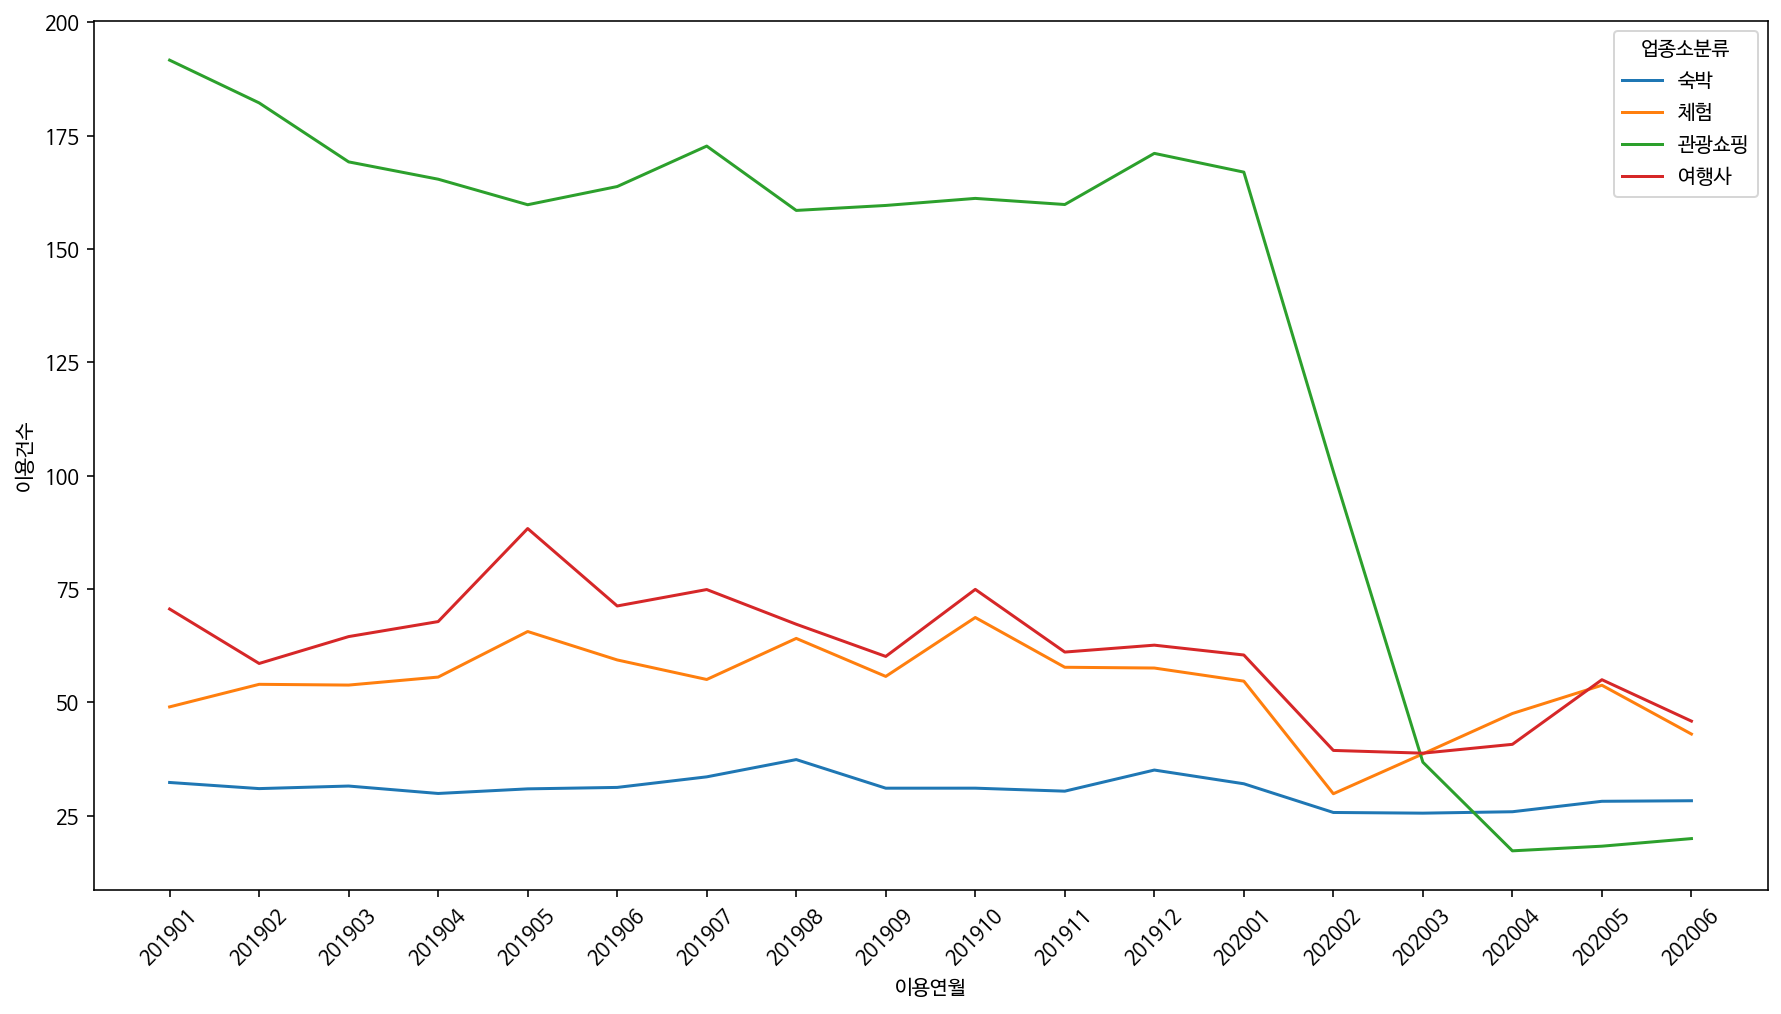

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.lineplot(data= df_tour.loc[(df['이용연월'] < '202007') & (df_tour['업종소분류'] != '교통')], x='이용연월', y='이용건수',hue='업종소분류' ,ci=None)

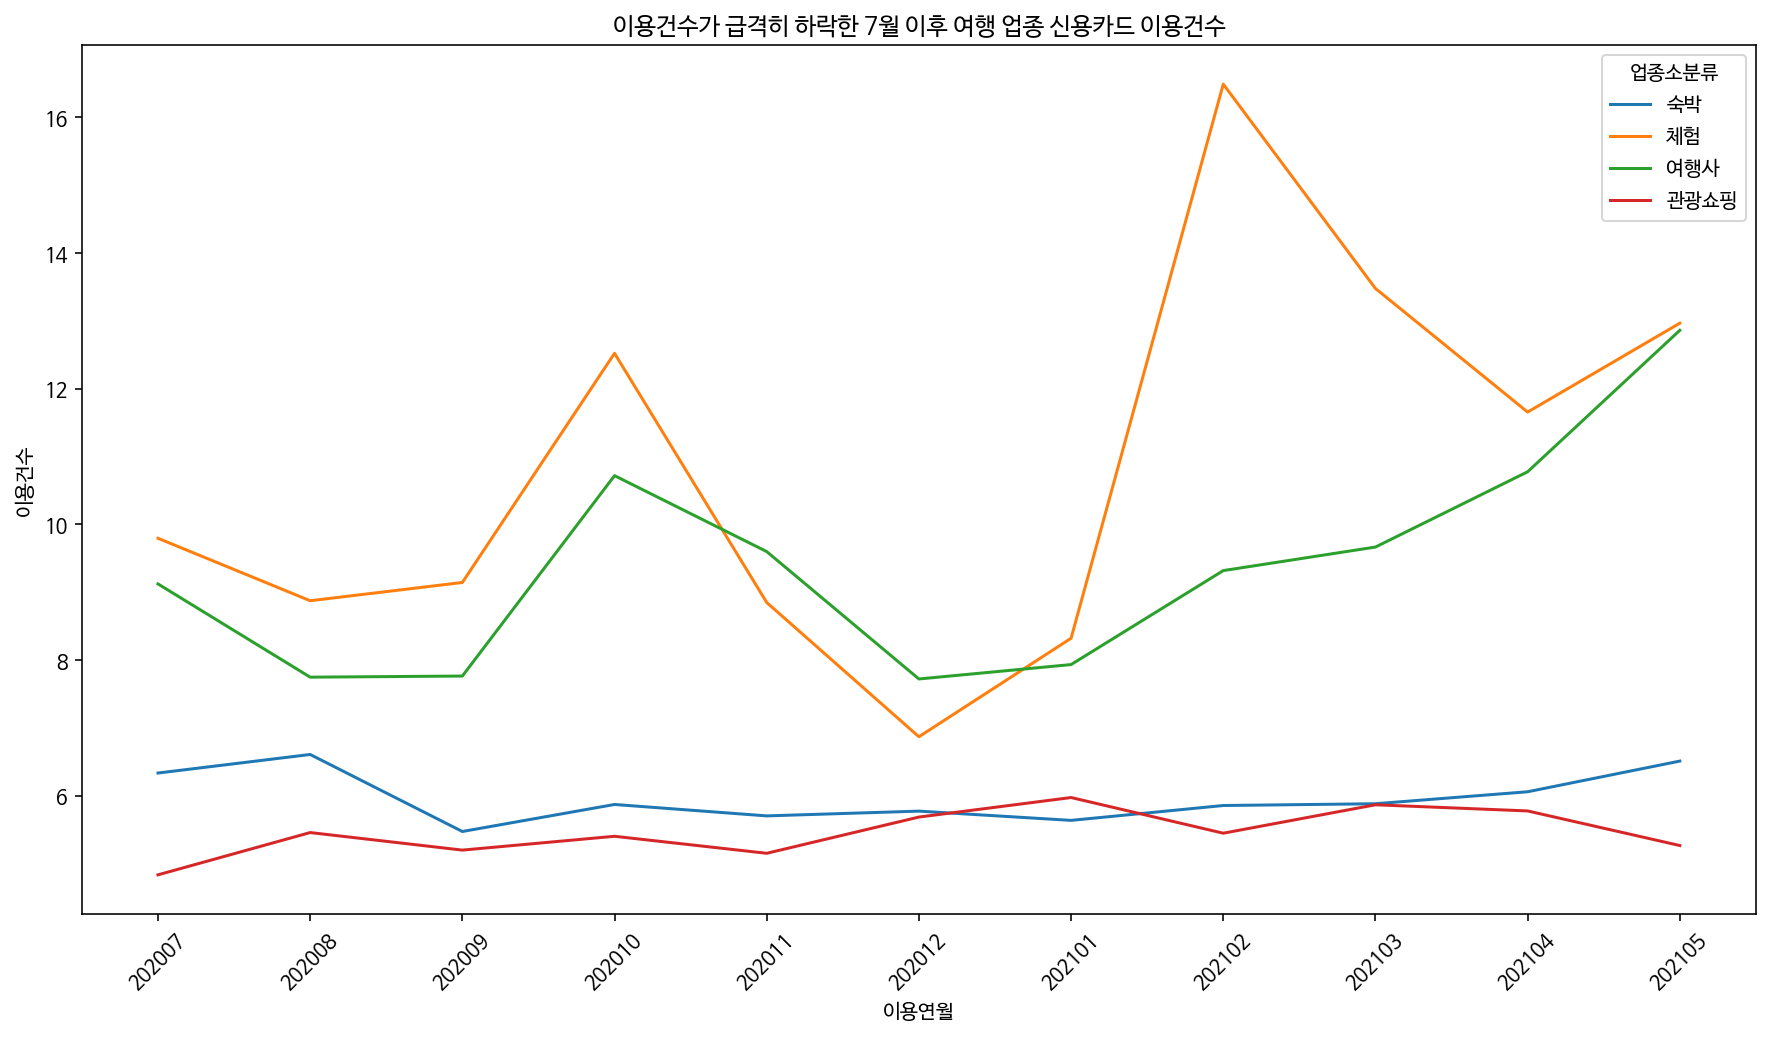

In [ ]:
# 7월에 왜 하락..? # 확진자수와 비교?
plt.figure(figsize=(15,8))
plt.title('이용건수가 급격히 하락한 7월 이후 여행 업종 신용카드 이용건수')
plt.xticks(rotation=45)
sns.lineplot(data= df_tour.loc[(df['이용연월'] >= '202007') & (df_tour['업종소분류'] != '교통')], x='이용연월', y='이용건수',hue='업종소분류' ,ci=None)

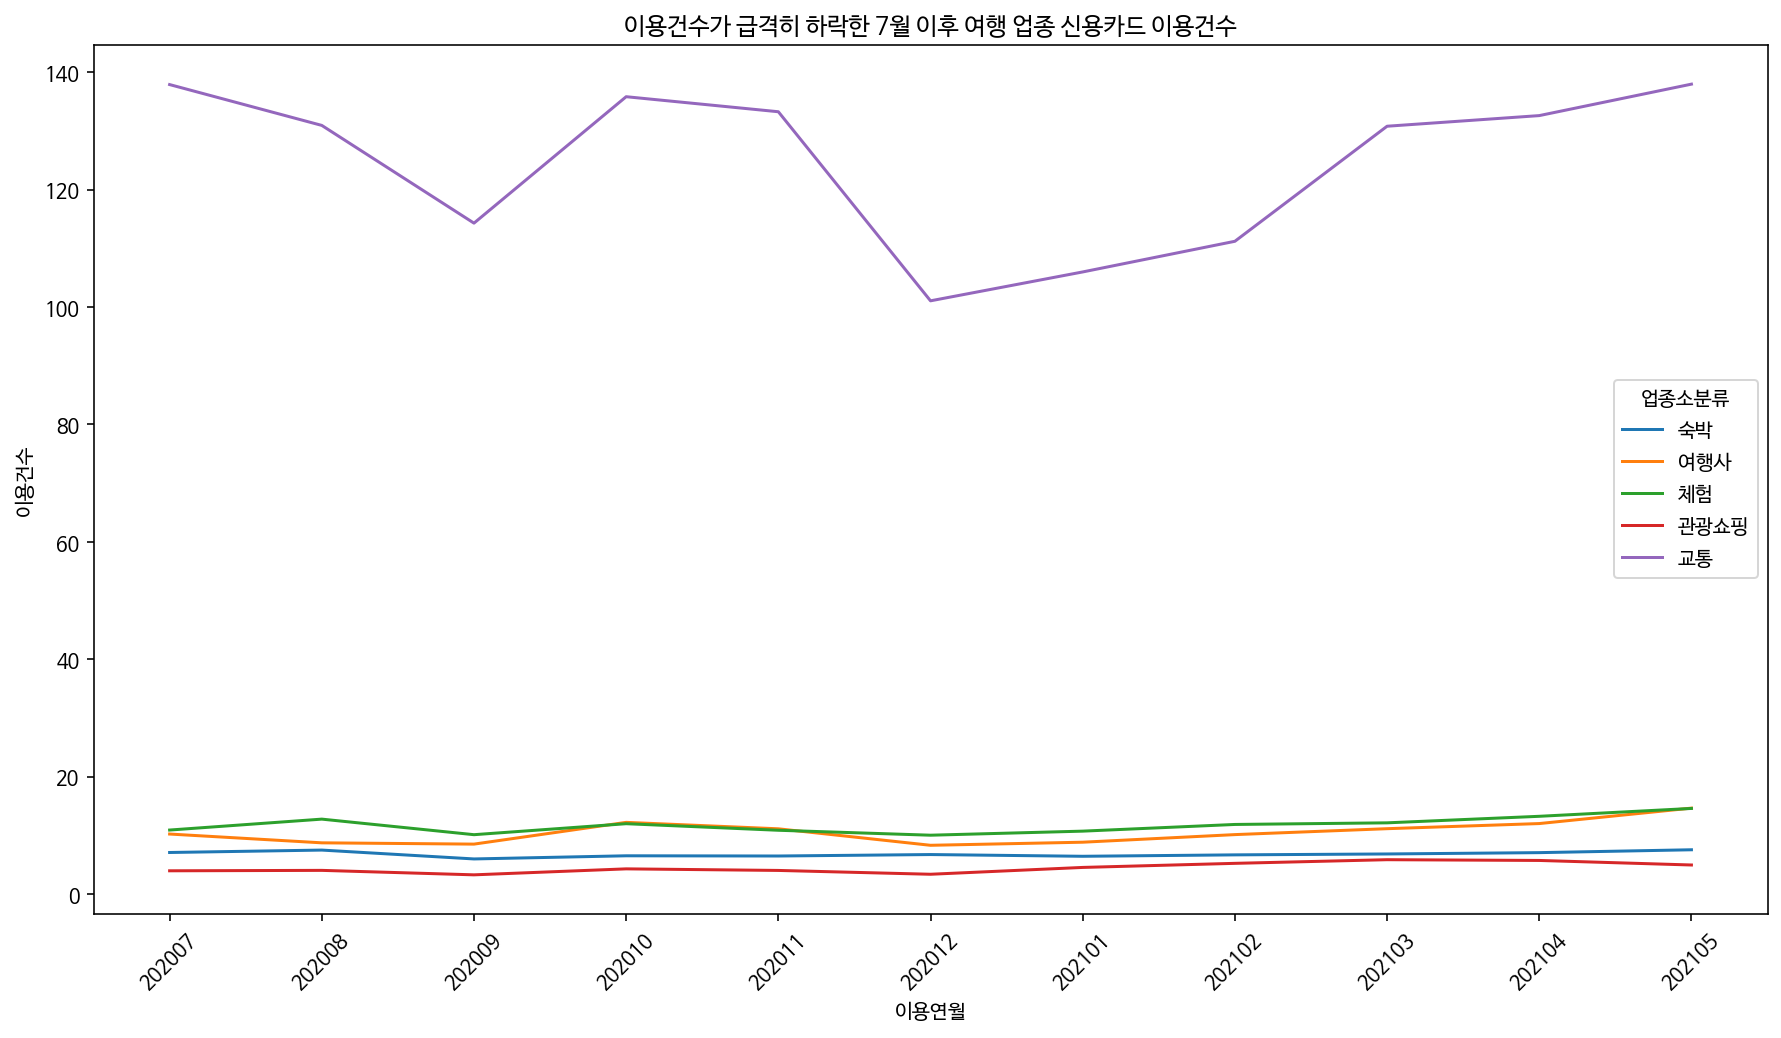

In [ ]:
# 7월에 왜 하락..?
plt.figure(figsize=(15,8))
plt.title('이용건수가 급격히 하락한 7월 이후 여행 업종 신용카드 이용건수')
plt.xticks(rotation=45)
sns.lineplot(data= df_tour.loc[df['이용연월'] >= '202007'], x='이용연월', y='이용건수',hue = '업종소분류', ci=None)

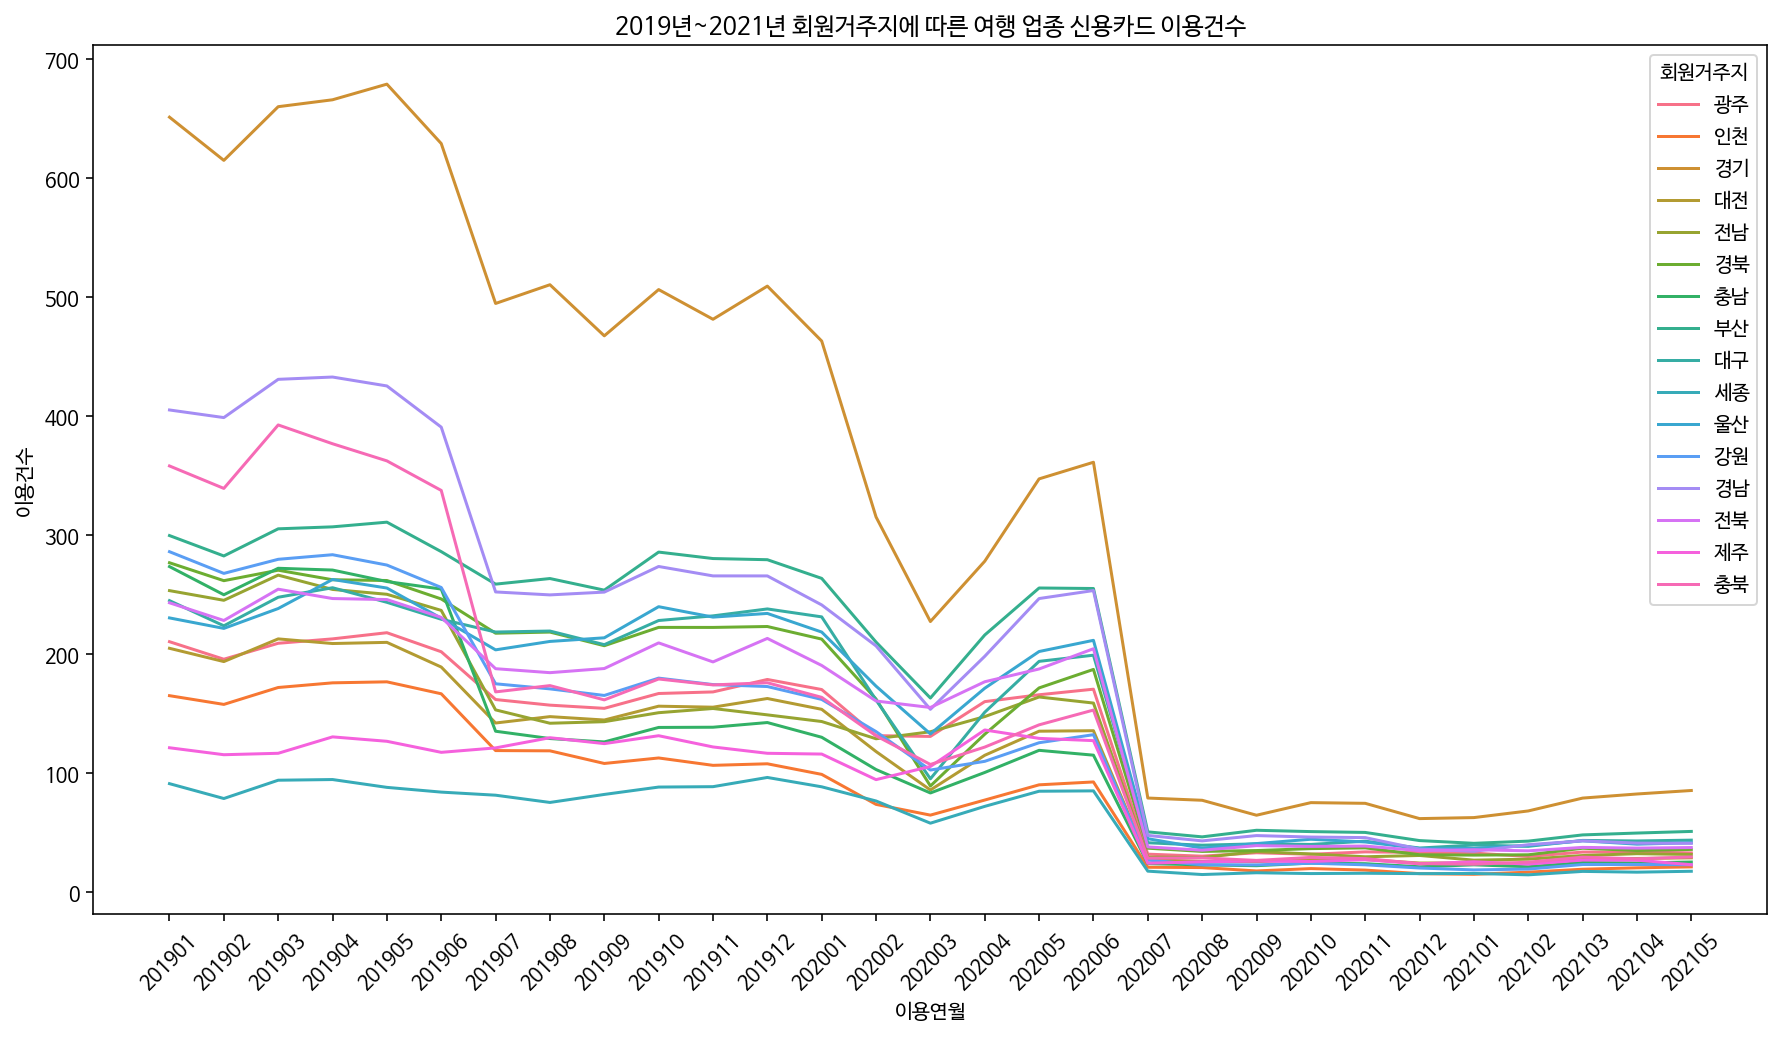

In [ ]:
plt.figure(figsize=(15,8))
plt.title('2019년~2021년 회원거주지에 따른 여행 업종 신용카드 이용건수')
plt.xticks(rotation=45)
sns.lineplot(data= df_tour, x='이용연월', y='이용건수', hue = '회원거주지', ci=None)

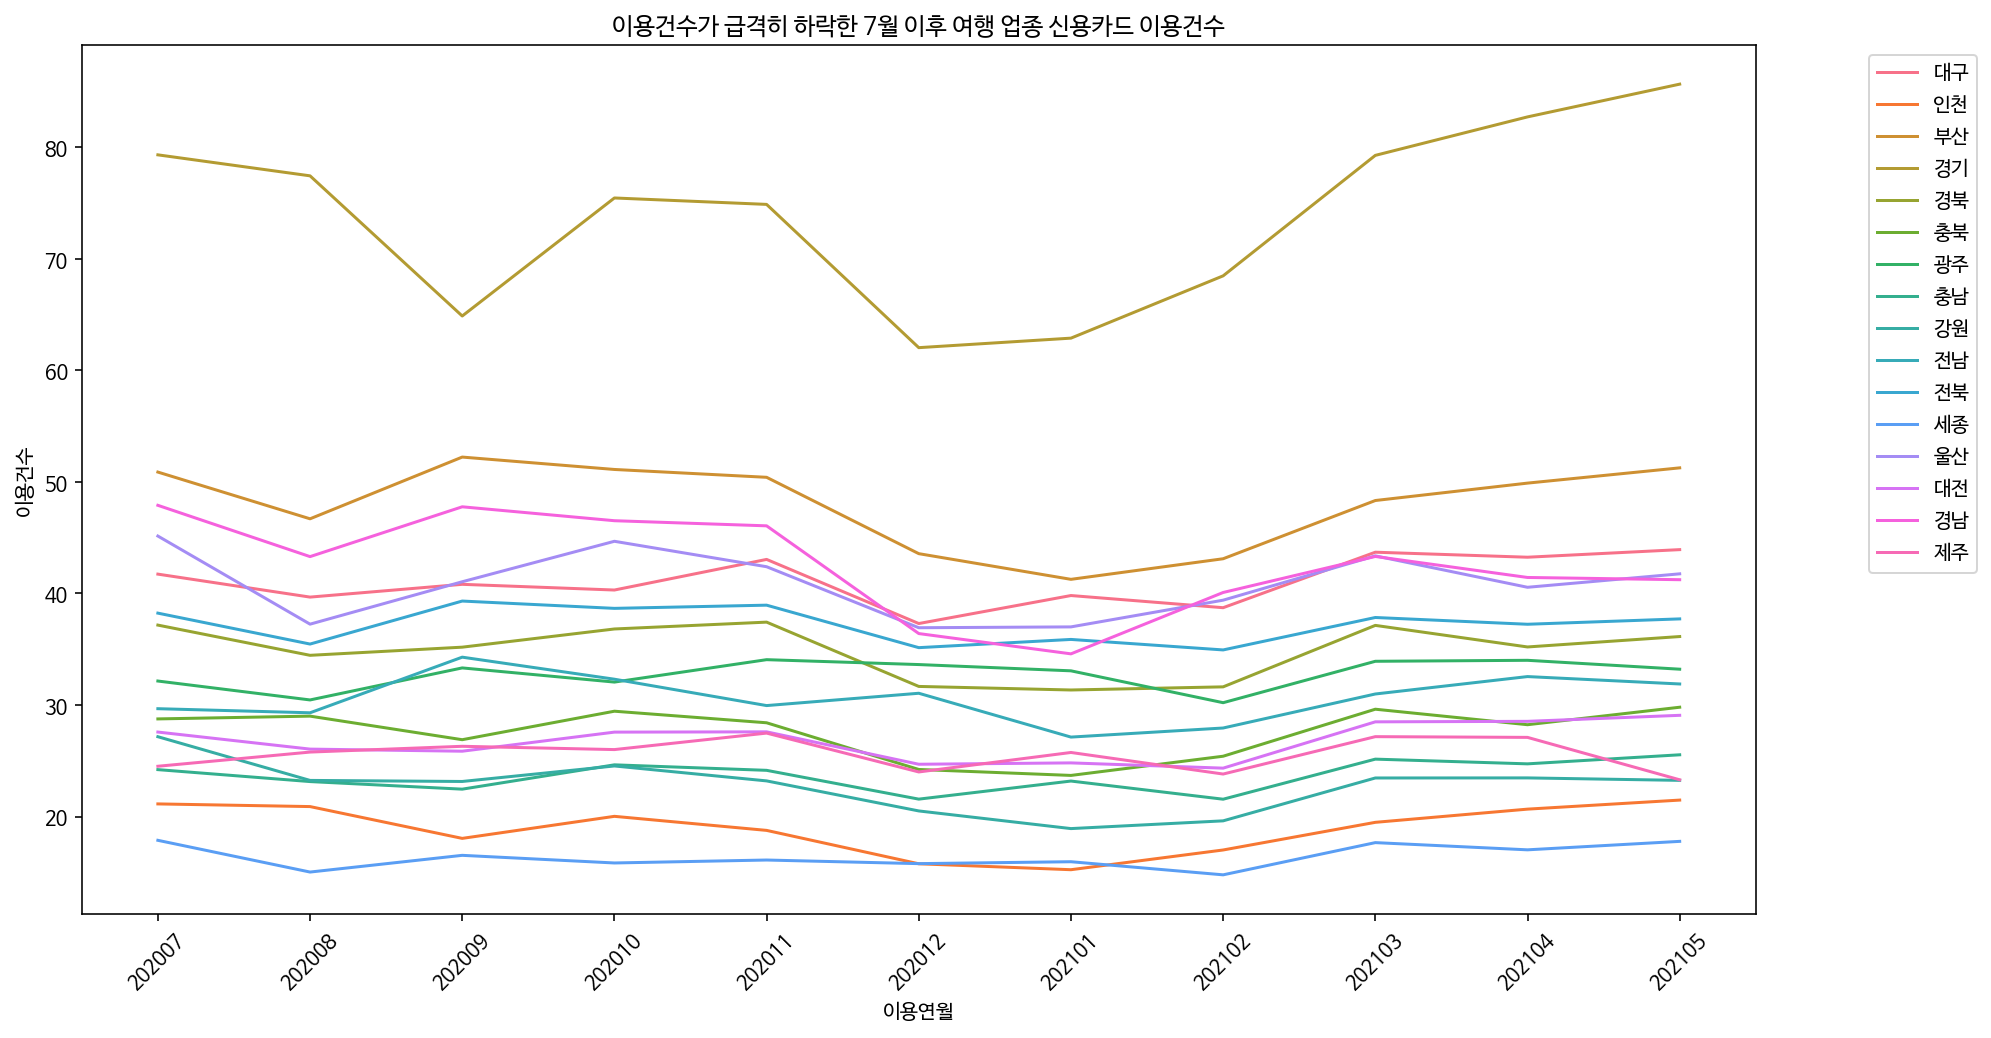

In [ ]:
# 2020년 7월에 급격히 감소하는 추세를 보여 따로 떼서 확인
plt.figure(figsize=(15,8))
plt.title('이용건수가 급격히 하락한 7월 이후 여행 업종 신용카드 이용건수')
plt.xticks(rotation=45)
sns.lineplot(data= df_tour.loc[df['이용연월'] >= '202007'], x='이용연월', y='이용건수', hue = '회원거주지', ci=None)

plt.legend(loc='upper center', bbox_to_anchor=(1.10, 1.0), ncol=1) #vertical legend

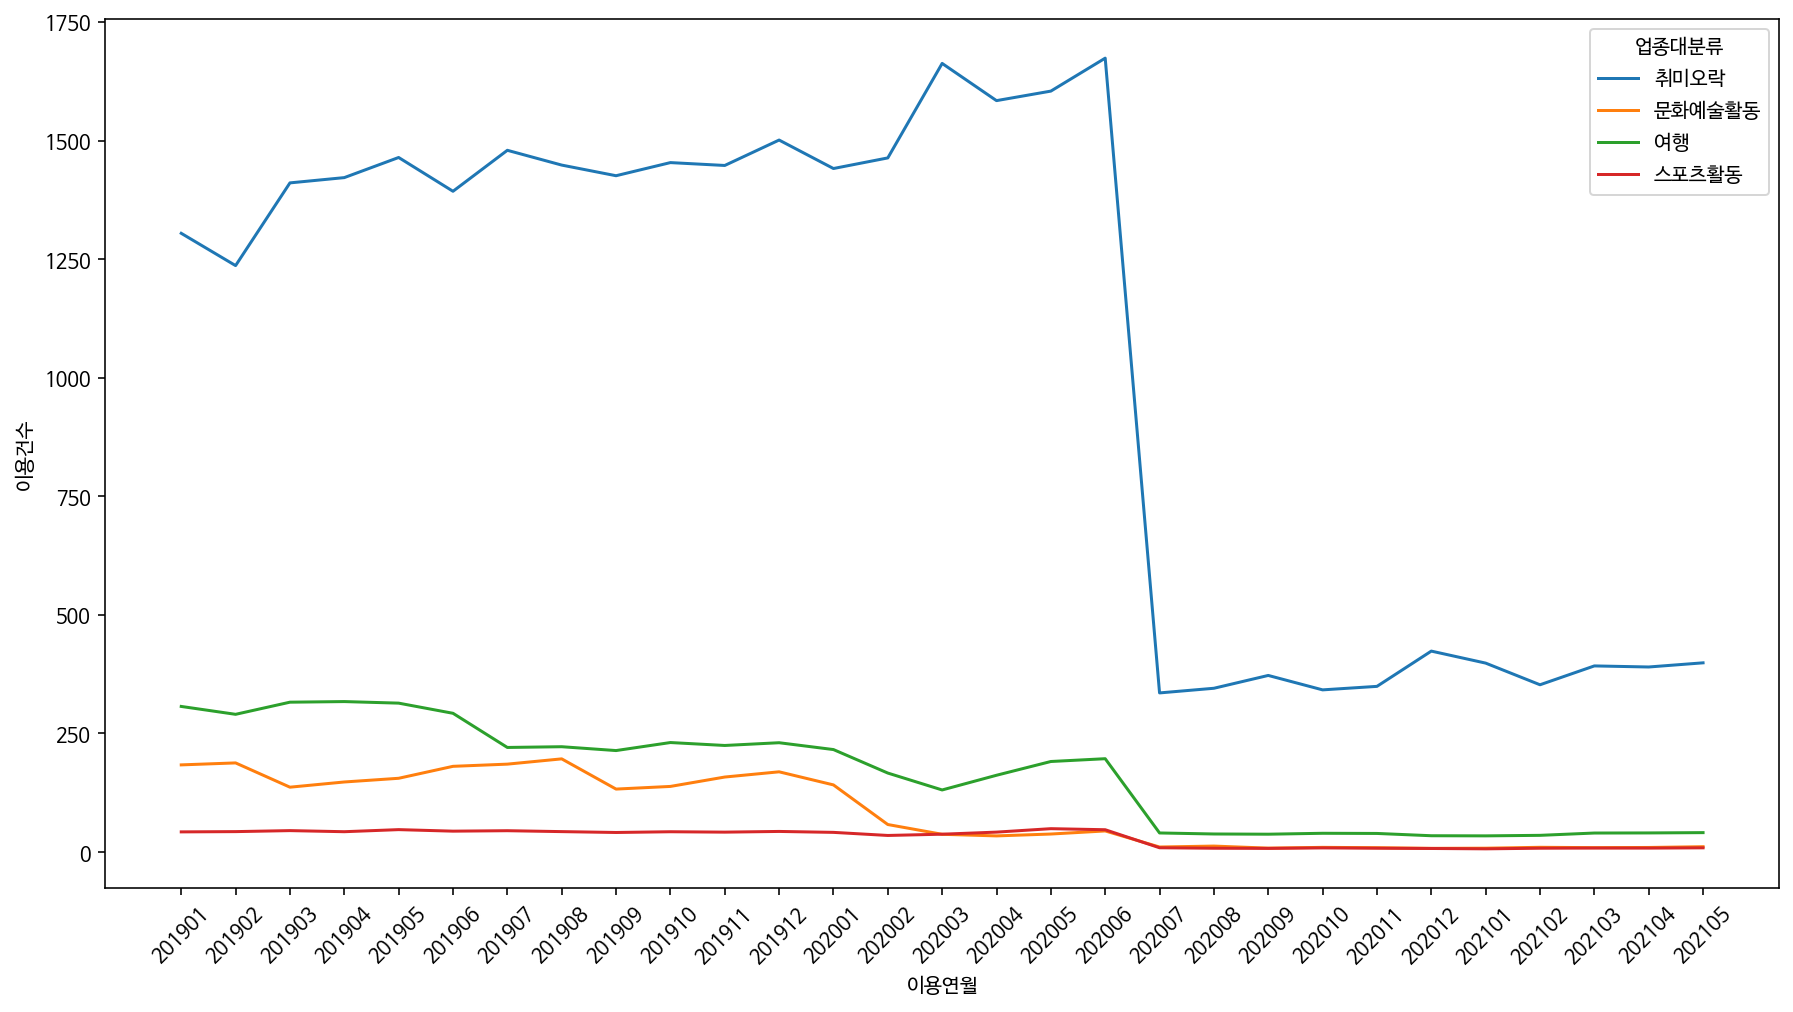

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.lineplot(data= df, x='이용연월', y='이용건수', hue = '업종대분류', ci=None)